In [ ]:
# --- Import necessary libraries ---
import os
import tensorflow as tf

# --- Check if GPU is available ---
print('GPU is', 'available' if tf.config.list_physical_devices('GPU') else 'not available')

GPU is not available


# Download Dataset

In [ ]:
# --- Install the opendatasets library for downloading dataset ---
!pip install opendatasets

In [ ]:
# --- Import opendatasets library ---
import opendatasets as od

# --- Download the Monkeypox skin lesion dataset from Kaggle ---
od.download(
   "https://www.kaggle.com/datasets/nafin59/monkeypox-skin-lesion-dataset/download?datasetVersionNumber=4", 
   force=True
)

# Prepare Data

In [ ]:
# --- Define paths for training, validation, and test datasets --- 
train_dir = "monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Train/"
val_dir = "monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Val/"
test_dir = "monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Test/"

In [ ]:
# --- Import necessary libraries --- 
import glob
import cv2
import numpy as np

# ---  Set image size for resizing --- 
SIZE = 285

# ---  Initialize lists to store training images and labels --- 
train_images = []
train_labels = []

# --- Load training images and labels --- 
for directory_path in glob.glob("archive/Fold1/Fold1/Fold1/Train/*"):
    label = directory_path.split("\\")[-1]  # Extract label from directory name
    print(f"Processing label: {label}")
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read image
        img = cv2.resize(img, (SIZE, SIZE))  # Resize image
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert color format
        train_images.append(img)
        train_labels.append(label)

# --- Convert lists to numpy arrays --- 
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# --- Print dataset shape for verification --- 
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")

Processing label: Monkeypox
Processing label: Others
Training images shape: (2142, 285, 285, 3)
Training labels shape: (2142,)


In [ ]:
# --- Initialize lists to store validation images and labels --- 
val_images = []
val_labels = []

# --- Load validation images and labels --- 
for directory_path in glob.glob("archive/Fold1/Fold1/Fold1/Val/*"):
    label = directory_path.split("\\")[-1]  # Extract label from directory name
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read image
        img = cv2.resize(img, (SIZE, SIZE))  # Resize image
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert color format
        val_images.append(img)
        val_labels.append(label)

# --- Convert lists to numpy arrays --- 
val_images = np.array(val_images)
val_labels = np.array(val_labels)

# --- Print dataset shape for verification --- 
print(f"Validation images shape: {val_images.shape}")
print(f"Validation labels shape: {val_labels.shape}")

Validation images shape: (420, 285, 285, 3)
Validation labels shape: (420,)


In [ ]:
# --- Initialize lists to store test images and labels --- 
test_images = []
test_labels = []

# --- Load test images and labels --- 
for directory_path in glob.glob("archive/Fold1/Fold1/Fold1/Test/*"):
    label = directory_path.split("\\")[-1]  # Extract label from directory name
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read image
        img = cv2.resize(img, (SIZE, SIZE))  # Resize image
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert color format
        test_images.append(img)
        test_labels.append(label)

# --- Convert lists to numpy arrays --- 
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# --- Print dataset shape for verification --- 
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Test images shape: (45, 285, 285, 3)
Test labels shape: (45,)


## Preprocessing

### Label Encoding

In [ ]:
# ---  Import preprocessing module from sklearn --- 
from sklearn import preprocessing

# ---  Initialize label encoders --- 
tr_le = preprocessing.LabelEncoder()
te_le = preprocessing.LabelEncoder()

# ---  Encode labels for training, validation, and test datasets --- 
train_labels_encoded = tr_le.fit_transform(train_labels)
val_labels_encoded = tr_le.transform(val_labels)
test_labels_encoded = te_le.fit_transform(test_labels)

# ---  Assign encoded labels to respective variables for training, validation, and test datasets --- 
y_train = train_labels_encoded
y_val = val_labels_encoded
y_test = test_labels_encoded

# ---  Print the shape of training data and labels for verification --- 
print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")


y_train shape: (2142,), y_val shape: (420,)


### Normalization

In [ ]:
# ---  Normalize pixel values to the range [0, 1] --- 
x_train = train_images / 255.0
x_val = val_images / 255.0
x_test = test_images / 255.0

# ---  Print normalized shapes for verification --- 
print(f"Normalized training images shape: {x_train.shape}")
print(f"Normalized validation images shape: {x_val.shape}")
print(f"Normalized test images shape: {x_test.shape}")

Normalized training images shape: (2142, 285, 285, 3)
Normalized validation images shape: (420, 285, 285, 3)
Normalized test images shape: (45, 285, 285, 3)


## Extracting Features

In [ ]:
# ---  Import TensorFlow --- 
import tensorflow as tf

# ---  Load pre-trained Xception model for feature extraction --- 
Xception_model = tf.keras.applications.Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(SIZE, SIZE, 3), 
    pooling='avg'
)

# ---  Freeze all layers of the model --- 
for layer in Xception_model.layers:
    layer.trainable = False

# ---  Print model summary --- 
Xception_model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 60s 1us/step


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 285, 285,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 142, 142,  │        864 │ input_layer_1[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 142, 142,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 142, 142,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 140, 140,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 140, 140,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 140, 140,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 140, 140,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 140, 140,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 140, 140,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 140, 140,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 140, 140,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 70, 70,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 70, 70,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 70, 70,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 70, 70,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 70, 70,    │          0 │ add_12[0][0]    

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
# ---  Extract features from training images using the Xception model --- 
feature_extractor = Xception_model.predict(x_train)

# ---  Reshape features for further processing --- 
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

# ---  Print feature shape for verification --- 
print(f"Extracted features shape: {features.shape}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step
Extracted features shape: (2142, 2048)


In [ ]:
# ---  Import pandas for saving features --- 
import pandas as pd

# ---  Convert features to a DataFrame --- 
X_for_training_df = pd.DataFrame(features)

# ---  Save features to a CSV file --- 
X_for_training_df.to_csv('X_for_training_df(285).csv', index=False)

print("Features saved to 'X_for_training_df(285).csv'")

Features saved to 'X_for_training_df(285).csv'


# Load the Data

To load the data, it is crucial to first run the "Prepare Data" steps and generate the `X_for_training_df(285).csv` file. This file contains the extracted features required for training the model.

In [ ]:
# --- Load the extracted features from the CSV file ---
X_for_training = pd.read_csv("X_for_training_df(285).csv")

# --- Display the first few rows of the loaded features for verification ---
X_for_training.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.506701,0.030750,0.000000,0.000153,0.000000,0.000000,0.034370,0.002492,0.019464,0.786703,...,0.016097,0.000000,0.000000,0.008185,0.052340,0.000000,0.000571,0.000000,0.000000,0.006400
1,0.279372,0.155948,0.000000,0.056593,0.000000,0.002223,0.095453,0.250530,0.003668,0.472911,...,0.008140,0.000000,0.005156,0.001921,0.056204,0.000000,0.000000,0.036795,0.000000,0.000000
2,1.219877,0.181387,0.003947,0.060751,0.009806,0.002638,0.003674,0.012604,0.003759,0.005294,...,0.124382,0.095252,0.070448,0.186396,0.073569,0.021579,0.000000,0.005409,0.001625,0.057653
3,0.343802,0.000288,0.000000,0.000435,0.006826,0.000000,0.000000,0.070365,0.003460,0.233346,...,0.009910,0.006271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.210690,0.056992,0.004010,0.054423,0.001793,0.000585,0.152950,0.084866,0.009941,0.225272,...,0.059756,0.002586,0.002643,0.001002,0.077948,0.000000,0.000000,0.041606,0.000000,0.000000


In [ ]:
# --- Import necessary libraries ---
import glob
import cv2
import os
from sklearn import preprocessing

# --- Initialize an empty list to store training labels ---
train_labels = [] 

# --- Loop through each directory in the training dataset to extract labels ---
for directory_path in glob.glob("archive/Fold1/Fold1/Fold1/Train/*"):
   label = directory_path.split("\\")[-1]  # Extract label from directory name
   print(label)  # Print the label for verification
   for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
       train_labels.append(label)  # Append the label for each image

# --- Convert the list of labels to a numpy array ---
train_labels = np.array(train_labels)
print(train_labels.shape)  # Print the shape of the labels array for verification

# --- Encode labels from text to integers ---
le = preprocessing.LabelEncoder()
le.fit(train_labels)  # Fit the label encoder to the training labels
train_labels_encoded = le.transform(train_labels)  # Transform labels to integers
y_train = train_labels_encoded  # Assign the encoded labels to y_train
print(y_train.shape)  # Print the shape of the encoded labels for verification

Monkeypox
Others
(2142,)
(2142,)


# Dimensionality Reduction

## PCA

In [ ]:
# --- Import PCA from sklearn ---
from sklearn.decomposition import PCA

# --- Perform PCA to retain 97% of the variance ---
pca = PCA(n_components=0.97)
X_reduced = pca.fit_transform(X_for_training)

# --- Print the total explained variance and the number of components ---
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2f}")
print(f"Number of components: {pca.n_components_}")

Total explained variance: 0.97
Number of components: 530


# AVOA-NGB Evaluation

## AVOA-NGB Cross-Validation

========= Fold 1 =========
Recall          : 97.53 %
Specificity     : 95.16 %
Precision       : 96.34 %
F1-Score        : 96.93 %
Accuracy        : 96.50 %
ROC AUC         : 0.96
Cohen Kappa     : 92.87


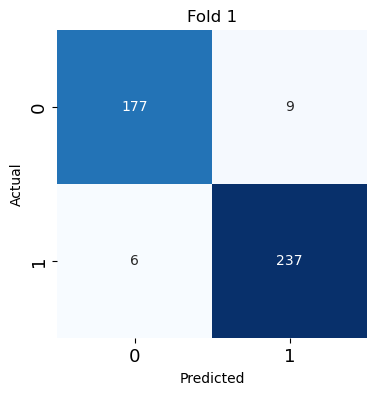

========= Fold 2 =========
Recall          : 99.53 %
Specificity     : 94.01 %
Precision       : 94.20 %
F1-Score        : 96.79 %
Accuracy        : 96.74 %
ROC AUC         : 0.97
Cohen Kappa     : 93.48


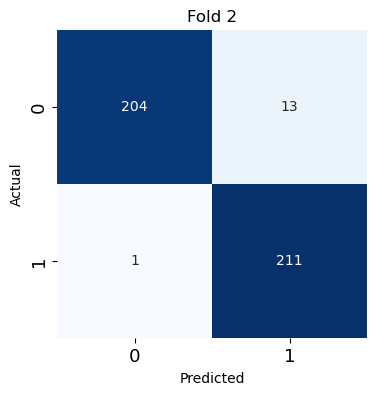

========= Fold 3 =========
Recall          : 98.32 %
Specificity     : 98.42 %
Precision       : 98.73 %
F1-Score        : 98.53 %
Accuracy        : 98.36 %
ROC AUC         : 0.98
Cohen Kappa     : 96.69


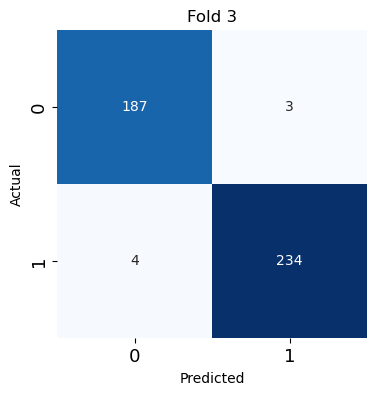

========= Fold 4 =========
Recall          : 96.65 %
Specificity     : 98.94 %
Precision       : 99.14 %
F1-Score        : 97.88 %
Accuracy        : 97.66 %
ROC AUC         : 0.98
Cohen Kappa     : 95.28


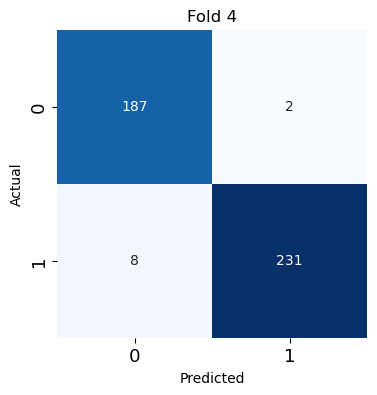

========= Fold 5 =========
Recall          : 98.70 %
Specificity     : 97.98 %
Precision       : 98.27 %
F1-Score        : 98.48 %
Accuracy        : 98.36 %
ROC AUC         : 0.98
Cohen Kappa     : 96.71


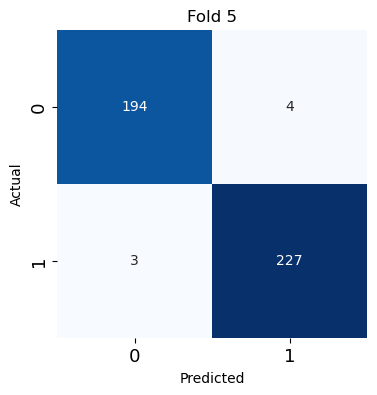


========== NGBoost Evaluation ==========
Recall           : 98.11
Specificity      : 96.84
Precision        : 97.35
F1 Score         : 97.73
Accuracy         : 97.53
ROC AUC          : 97.47
Cohen Kappa      : 95.01


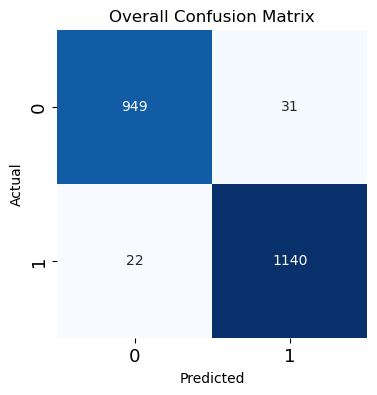


Fold-wise and overall metrics saved to 'ngb_fold_results.csv'.


In [ ]:

# --- Import necessary libraries ---

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ngboost import NGBClassifier
from sklearn.svm import SVR

from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, cohen_kappa_score, confusion_matrix
)

# --- Configuration Flags ---
# Control visualization and output behavior
show_conf_matrix = True        # Show confusion matrix for each fold
save_conf_matrix = True        # Save confusion matrices (fold-wise + overall) as SVG
save_fold_metrics_csv = True   # Save fold-wise and overall results to CSV
csv_filename = "ngb_fold_results.csv"

# --- Setup Cross-Validation ---
# Initialize k-fold cross-validator with reproducible randomization
kf = KFold(n_splits=5, random_state=5358, shuffle=True)
y_trainn = y_train  # Store original training labels
i = 1  # Fold counter

# --- Define SVR Parameters for Base Learner ---
svr_params = {
    'C': 1.45018914e+00,
    'gamma': 8.91264729e-03,
    'kernel': 'rbf',
    'epsilon': 7.35945884e-02
}

# --- Define NGBoost Classifier Parameters ---
ngb_params = {
    'verbose': False,
    'natural_gradient': False,
    'Base': SVR(**svr_params),
    'n_estimators': 5,
    'learning_rate': 1.09214810e-01
}

# --- Initialize NGBoost Classifier ---
ngb_clf = NGBClassifier(**ngb_params)

# --- Aggregate Confusion Matrix Counters ---
# Initialize counters for overall confusion matrix calculation
tn, fp, fn, tp = [0] * 4  # True negatives, false positives, false negatives, true positives
results_per_fold = []  # Store metrics for each fold
y_true_all = []  # Collect all actual labels across folds
y_pred_all = []  # Collect all predicted labels across folds

# --- Cross-Validation Loop ---
# Iterate through each fold of the dataset
for train_index, test_index in kf.split(X_reduced):
    # Create a fresh copy of the classifier for each fold
    clone_clf = clone(ngb_clf)

    # Train-test split for this fold
    X_train, X_test = X_reduced[train_index], X_reduced[test_index]
    y_train_fold, y_test_fold = y_trainn[train_index], y_trainn[test_index]

    # Train model and generate predictions
    clone_clf.fit(X_train, y_train_fold)
    y_pred = clone_clf.predict(X_test)

    # Save predictions for overall metrics calculation
    y_true_all.extend(y_test_fold)
    y_pred_all.extend(y_pred)

    # --- Calculate Performance Metrics for Current Fold ---
    acc = accuracy_score(y_test_fold, y_pred)
    prec = precision_score(y_test_fold, y_pred)
    rec = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    auc = roc_auc_score(y_test_fold, y_pred)
    kappa = cohen_kappa_score(y_test_fold, y_pred)

    # Calculate confusion matrix and specificity
    cm = confusion_matrix(y_test_fold, y_pred)
    spec = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # TN / (TN + FP)

    # Update aggregate confusion matrix counters
    tn += cm[0, 0]  # True negatives
    fp += cm[0, 1]  # False positives
    fn += cm[1, 0]  # False negatives
    tp += cm[1, 1]  # True positives

    # Store metrics for this fold in results collection
    results_per_fold.append({
        "Fold": i,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "Specificity": spec,
        "F1 Score": f1,
        "ROC AUC": auc,
        "Cohen Kappa": kappa
    })

    # --- Display Fold Metrics in Console ---
    print(f"========= Fold {i} =========")
    print(f"Recall          : {rec * 100:.2f} %")
    print(f"Specificity     : {spec * 100:.2f} %")
    print(f"Precision       : {prec * 100:.2f} %")
    print(f"F1-Score        : {f1 * 100:.2f} %")
    print(f"Accuracy        : {acc * 100:.2f} %")
    print(f"ROC AUC         : {auc:.2f}")
    print(f"Cohen Kappa     : {kappa * 100:.2f}")
    
    # --- Plot & Save Confusion Matrix for Current Fold ---
    if show_conf_matrix or save_conf_matrix:
        # Format confusion matrix cell values
        group_counts = [f"{value}" for value in cm.flatten()]
        labels = np.asarray(group_counts).reshape(2, 2)
        
        # Create heatmap visualization
        plt.figure(figsize=(4, 4))
        ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
        ax.set_title(f'Fold {i}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.xaxis.set_ticklabels(['0', '1'])
        ax.yaxis.set_ticklabels(['0', '1'])
        ax.tick_params(axis='both', labelsize=13)
        
        # Save confusion matrix visualization if configured
        if save_conf_matrix:
            ax.figure.savefig(f"Fold_{i}.svg", format="svg", bbox_inches='tight')
        
        # Display or close the plot
        if show_conf_matrix:
            plt.show()
        else:
            plt.close()

    print("======================================================")
    i += 1  # Increment fold counter

# --- Compute Overall Performance Metrics --- 
# Create overall confusion matrix from aggregated counts
ovrlp_cm = np.array([[tn, fp], [fn, tp]])

# Calculate aggregate performance metrics
precision = tp / (tp + fp)  # Positive predictive value
recall = tp / (tp + fn)  # Sensitivity/true positive rate
specificity = tn / (tn + fp)  # True negative rate
f1 = tp / (tp + (fn + fp) / 2)  # Harmonic mean of precision and recall
accuracy = (tp + tn) / len(y_trainn)  # Overall accuracy
auc = roc_auc_score(y_true_all, y_pred_all)  # Area under ROC curve
kappa = cohen_kappa_score(y_true_all, y_pred_all)  # Inter-rater agreement

# --- Append Overall Results to DataFrame --- 
results_per_fold.append({
    "Fold": "Overall",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "Specificity": specificity,
    "F1 Score": f1,
    "ROC AUC": auc,
    "Cohen Kappa": kappa
})

# --- Display Overall Metrics in Console ---
results_dict = {
    "Recall": recall * 100,
    "Specificity": specificity * 100,
    "Precision": precision * 100,
    "F1 Score": f1 * 100,
    "Accuracy": accuracy * 100,
    "ROC AUC": auc * 100,
    "Cohen Kappa": kappa * 100
}

print("\n========== NGBoost Evaluation ==========")
for metric, value in results_dict.items():
    print(f"{metric:<17}: {value:.2f}")

# --- Plot Overall Confusion Matrix ---
# Format and visualize the aggregate confusion matrix
labels = np.array([f"{v}" for v in ovrlp_cm.flatten()]).reshape(2, 2)
plt.figure(figsize=(4, 4))
ax = sns.heatmap(ovrlp_cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set_title('Overall Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
ax.tick_params(axis='both', labelsize=13)

# Save overall confusion matrix if configured
if save_conf_matrix:
    ax.figure.savefig("overlapped.svg", format="svg", bbox_inches='tight')

# Display or close the plot
if show_conf_matrix:
    plt.show()
else:
    plt.close()

# --- Save Fold-wise + Overall Results to CSV ---
if save_fold_metrics_csv:
    df_results = pd.DataFrame(results_per_fold)
    df_results.to_csv(csv_filename, index=False)
    print(f"\nFold-wise and overall metrics saved to '{csv_filename}'.")